# Core ML/Posenetで「人体の姿勢を推定」する

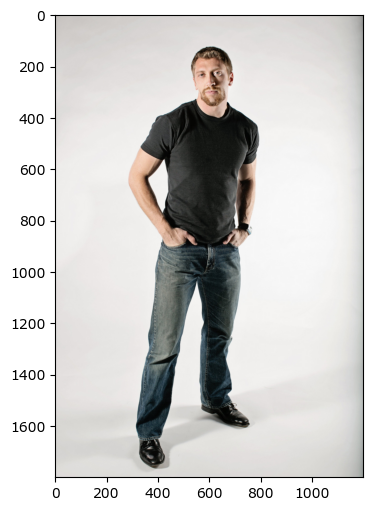

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pylab as plt

#img = photos.capture_image()
pil_img = Image.open(
    "brett_lark_cancer_cure_pose_healing_healthy_male.jpg")

plt.figure(figsize=[6,6])
plt.imshow(np.array(pil_img), aspect=1.0)

In [2]:
from coreml.image_recognition import *
#from uikit.ui_uiimage_convert import *

if pil_img:
    scale_image(pil_img, 224)
    vn_model = load_model(
        'https://ml-assets.apple.com/coreml/models/Image/PoseEstimation/PoseNet/PoseNetMobileNet100S8FP16.mlmodel',
        'PoseNetMobileNet100S8FP16.mlmodel',
        os.getcwd()+'/models/')
    result =  performRequests_image(vn_model, pil_img)
    if not result:
        print('処理できませんでした')
print( result[1] )

0.00% downloaded
1.53% downloaded
3.05% downloaded
4.58% downloaded
6.10% downloaded
7.63% downloaded
9.15% downloaded
10.68% downloaded
12.20% downloaded
13.73% downloaded
15.25% downloaded
16.78% downloaded
18.30% downloaded
19.83% downloaded
21.35% downloaded
22.88% downloaded
24.40% downloaded
25.93% downloaded
27.45% downloaded
28.98% downloaded
30.50% downloaded
32.03% downloaded
33.55% downloaded
35.08% downloaded
36.60% downloaded
38.13% downloaded
39.65% downloaded
41.18% downloaded
42.70% downloaded
44.23% downloaded
45.75% downloaded
47.28% downloaded
48.80% downloaded
50.33% downloaded
51.86% downloaded
53.38% downloaded
54.91% downloaded
56.43% downloaded
57.96% downloaded
59.48% downloaded
61.01% downloaded
62.53% downloaded
64.06% downloaded
65.58% downloaded
67.11% downloaded
68.63% downloaded
70.16% downloaded
71.68% downloaded
73.21% downloaded
74.73% downloaded
76.26% downloaded
77.78% downloaded
79.31% downloaded
80.83% downloaded
82.36% downloaded
83.88% downloaded

[17, 65, 65]


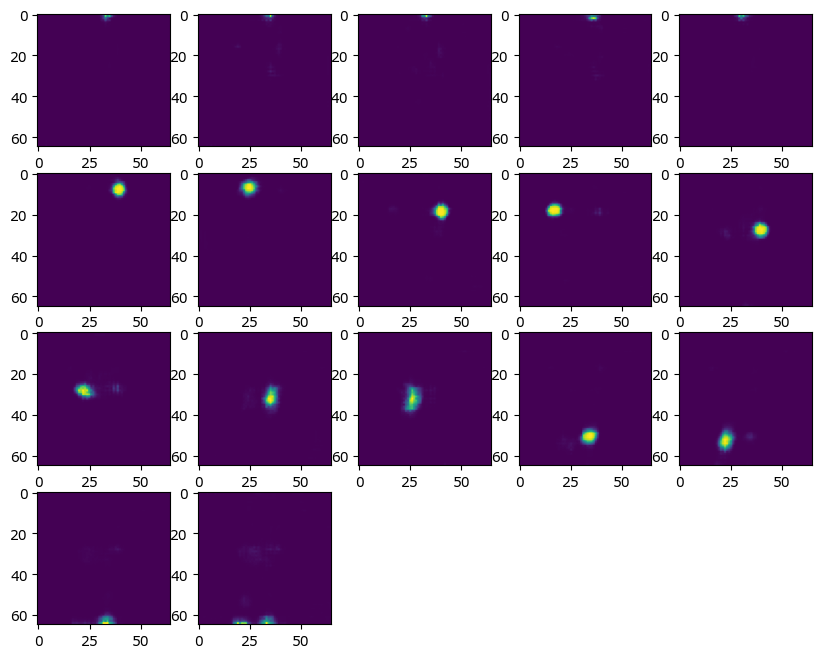

In [3]:
multi_array = result[1].featureValue().multiArrayValue()
[key, height, width] = [i.integerValue() for i in multi_array.shape()]

positions = []

print([key, height, width])
plt.figure(figsize=(10,10))
for k in range(key):
    heat_map = np.empty([height,width])
    for h in range(height):
        for w in range(width):
            index = 0
            index = index + k * multi_array.strides()[0].integerValue()
            index = index + h * multi_array.strides()[1].integerValue()
            index = index + w * multi_array.strides()[2].integerValue()
            heat_map[h,w] = multi_array.objectAtIndexedSubscript_(index).doubleValue()
    positions.append(np.unravel_index(np.argmax(heat_map),
                                      heat_map.shape) )
    plt.subplot(5,5,k+1)
    plt.imshow(heat_map)

<Figure size 600x600 with 0 Axes>

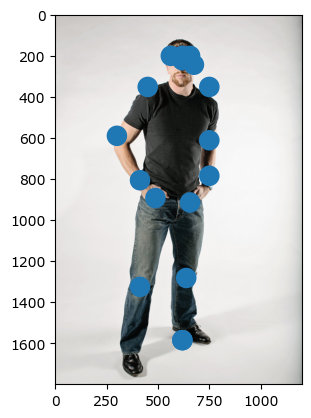

In [4]:
plt.figure(figsize=[6,6])

fig, ax = plt.subplots(1)
ax.imshow(np.array(pil_img), aspect=1.0)

[h,w,_] = np.array(pil_img).shape

from matplotlib.patches import Circle
for pos in positions:
    ax.add_patch(
        Circle( (pos[1]*w/64, pos[0]*h/64/1.3+200), 50) )